In [73]:
!pip install squarify

In [62]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 915 kB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
# Read Data from CSV File
url = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Census_Income_Project/census_income.csv"
df = pd.read_csv(url)

# Adjust index to start from 1 instead of 0
df.index += 1

In [35]:
# Show top 5 rows of DataFrame
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Check DataFrame Shape
df.shape

(32560, 15)

In [5]:
# Get datatypes of all columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
# Get full info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Get Summery of DataFrame
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [36]:
# Get DataFrame of rows with missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


<AxesSubplot:>

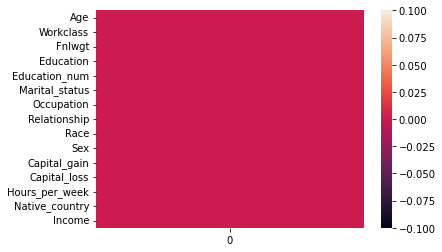

In [10]:
# Check DataFrame for null value
sns.heatmap(df.isnull().sum().to_frame())

In [17]:
# Checking income categories
income = df['Income'].value_counts(normalize=True)
income

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

# Data Visualization

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


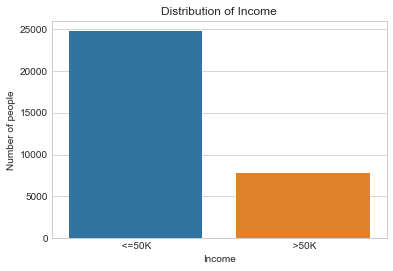

In [27]:
# Income Distribution
income = df['Income'].value_counts()

sns.barplot(income.index, income.values)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


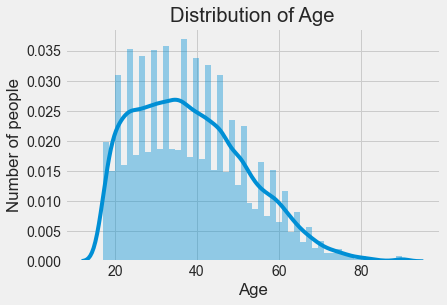

In [36]:
# Age Distribution
age = df['Age'].value_counts()

sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


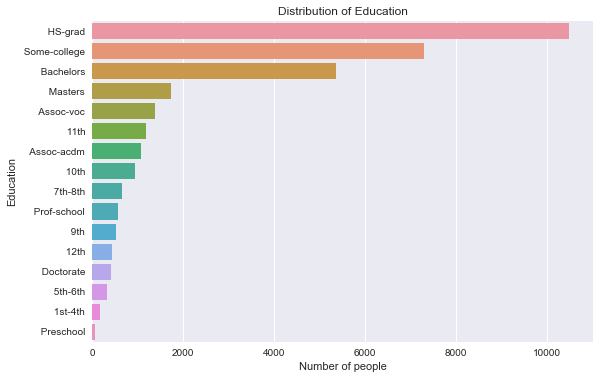

In [41]:
# Education Distribution
edu = df['Education'].value_counts()

plt.style.use('seaborn')
sns.barplot(edu.values, edu.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


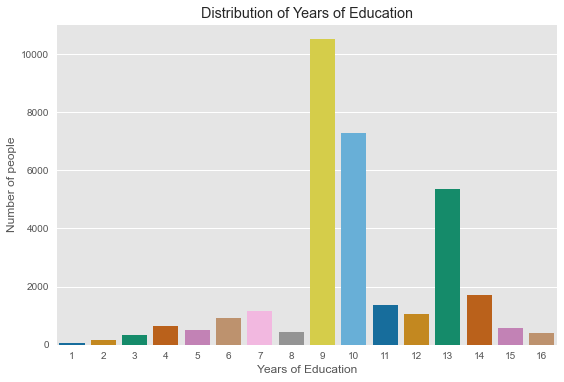

In [44]:
# Years of Education Distribution
edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.show()

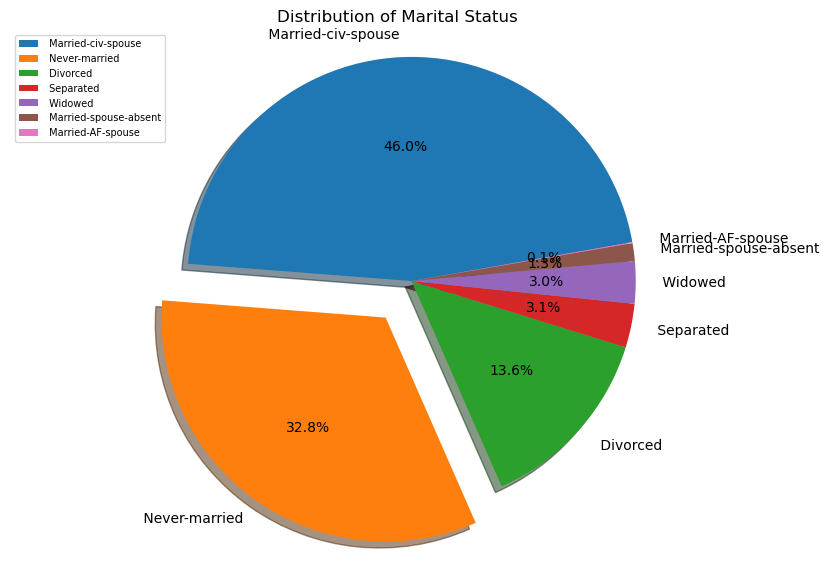

In [64]:
# Marital Status Distribution
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

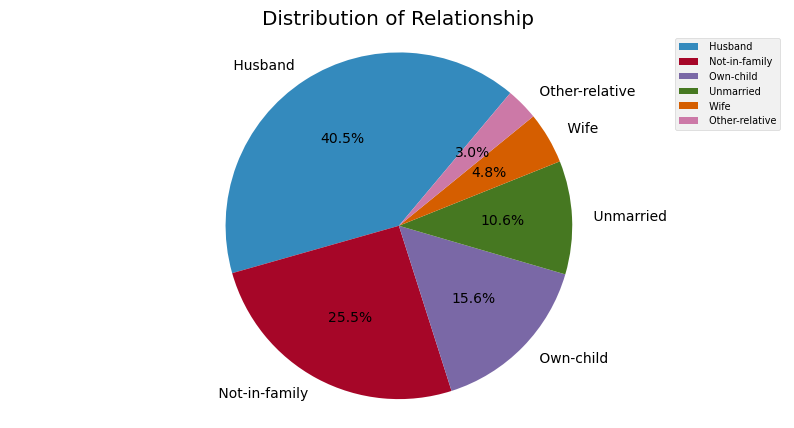

In [63]:
# Relationship Distribution
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(10, 5))
plt.pie(relation.values, labels=relation.index, startangle=50, autopct='%1.1f%%')
# centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
plt.title('Distribution of Relationship')
plt.axis('equal')
plt.legend(prop={'size': 7})
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


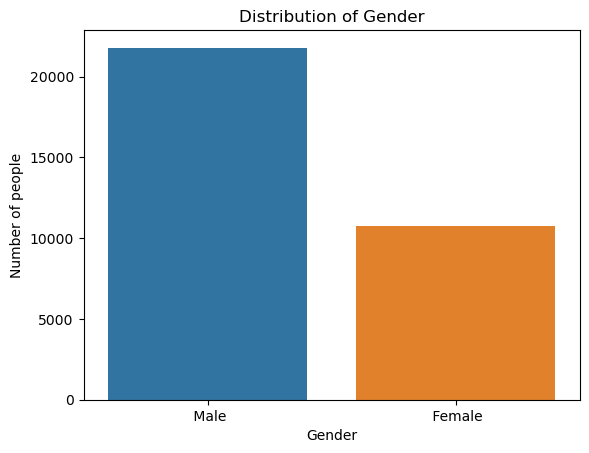

In [70]:
# Gender Distribution
sex = df['Sex'].value_counts()

sns.barplot(sex.index, sex.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

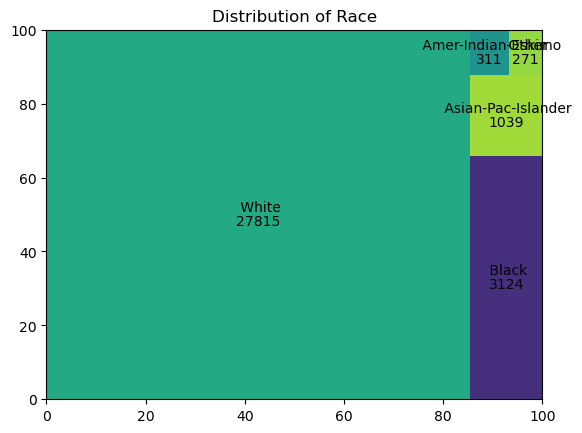

In [78]:
# Race Distribution
import squarify
race = df['Race'].value_counts()

plt.style.use('default')
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Distribution of Race')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


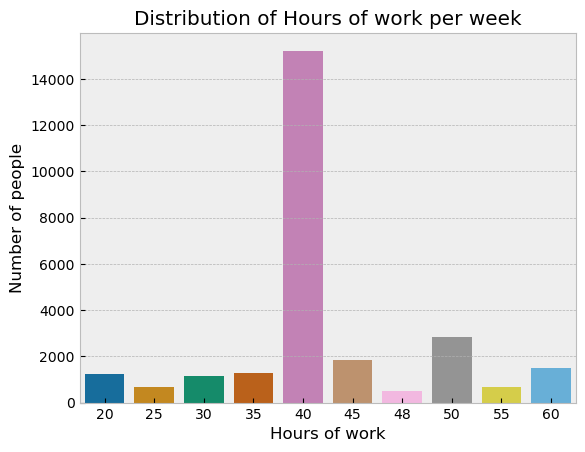

In [82]:
# Hours per week Distribution
hours = df['Hours_per_week'].value_counts().head(10)

sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.show()


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


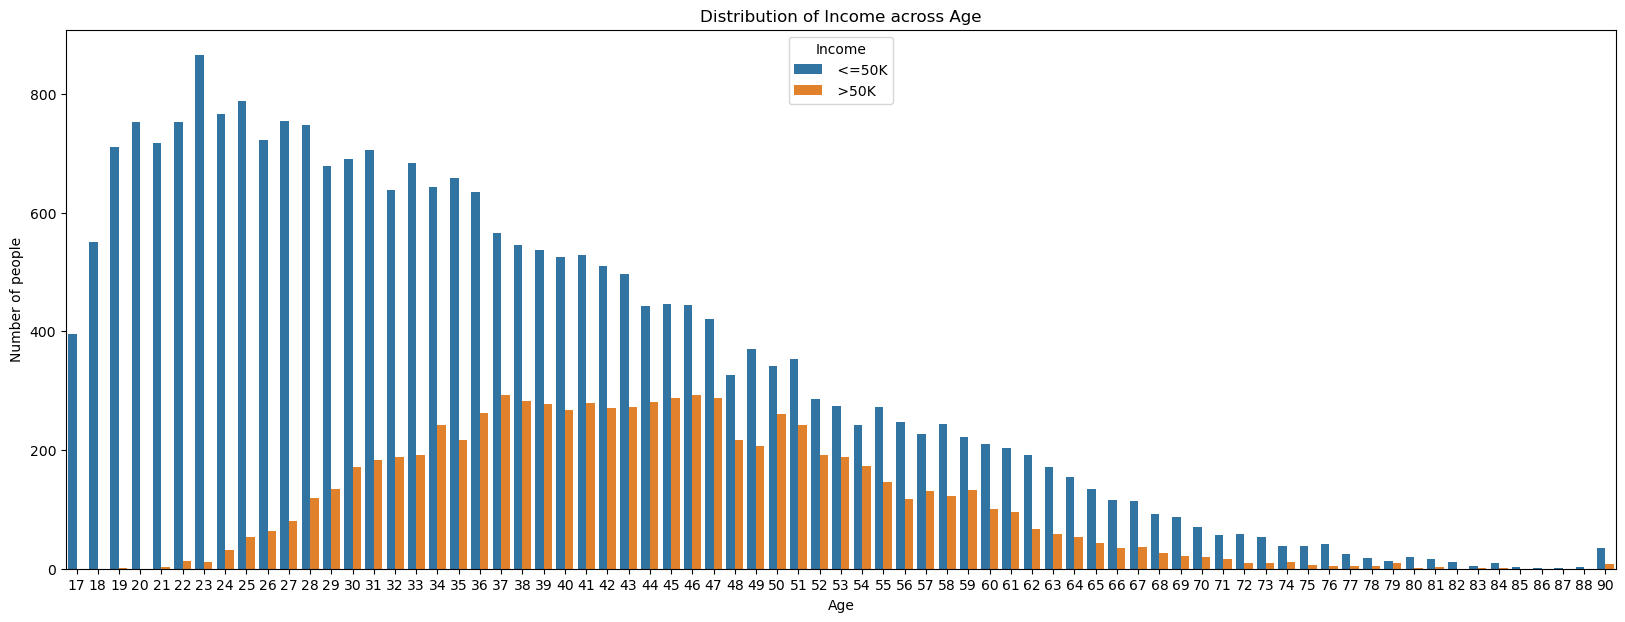

In [87]:
# Income v/s Age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


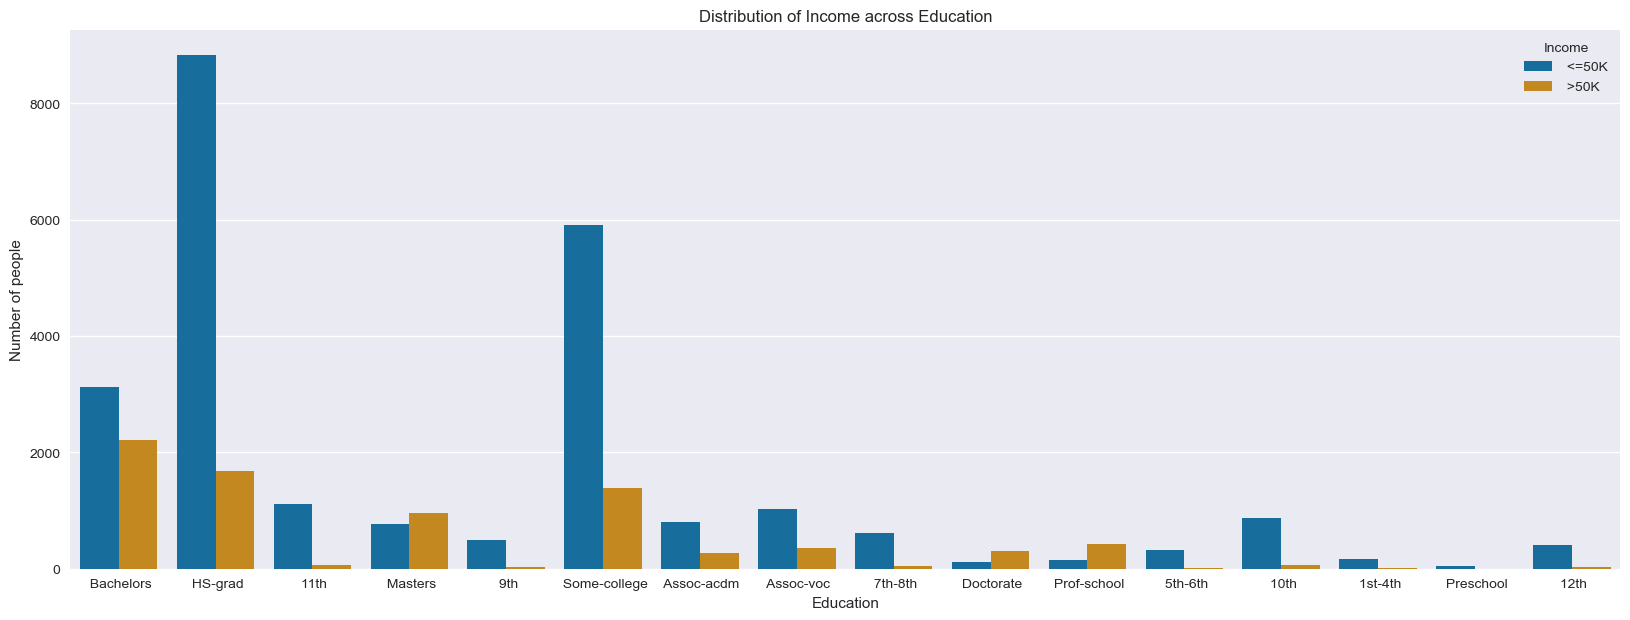

In [91]:
# Income v/s Education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'], hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


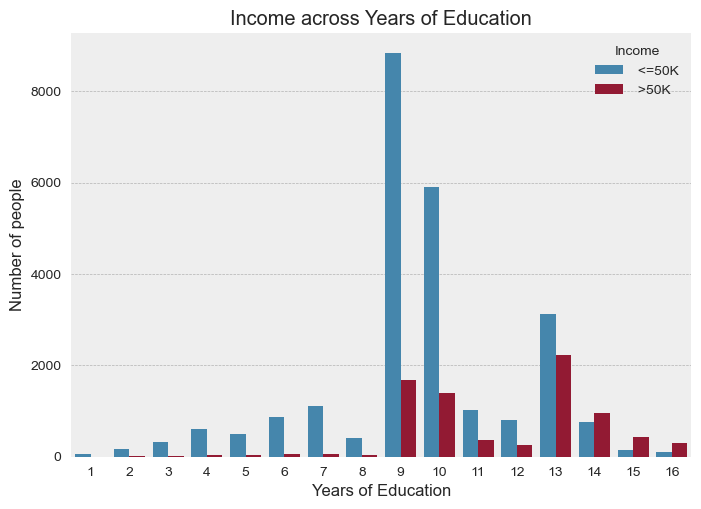

In [96]:
# Income v/s Years of Education
plt.style.use('bmh')
sns.countplot(df['Education_num'], hue=df['Income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


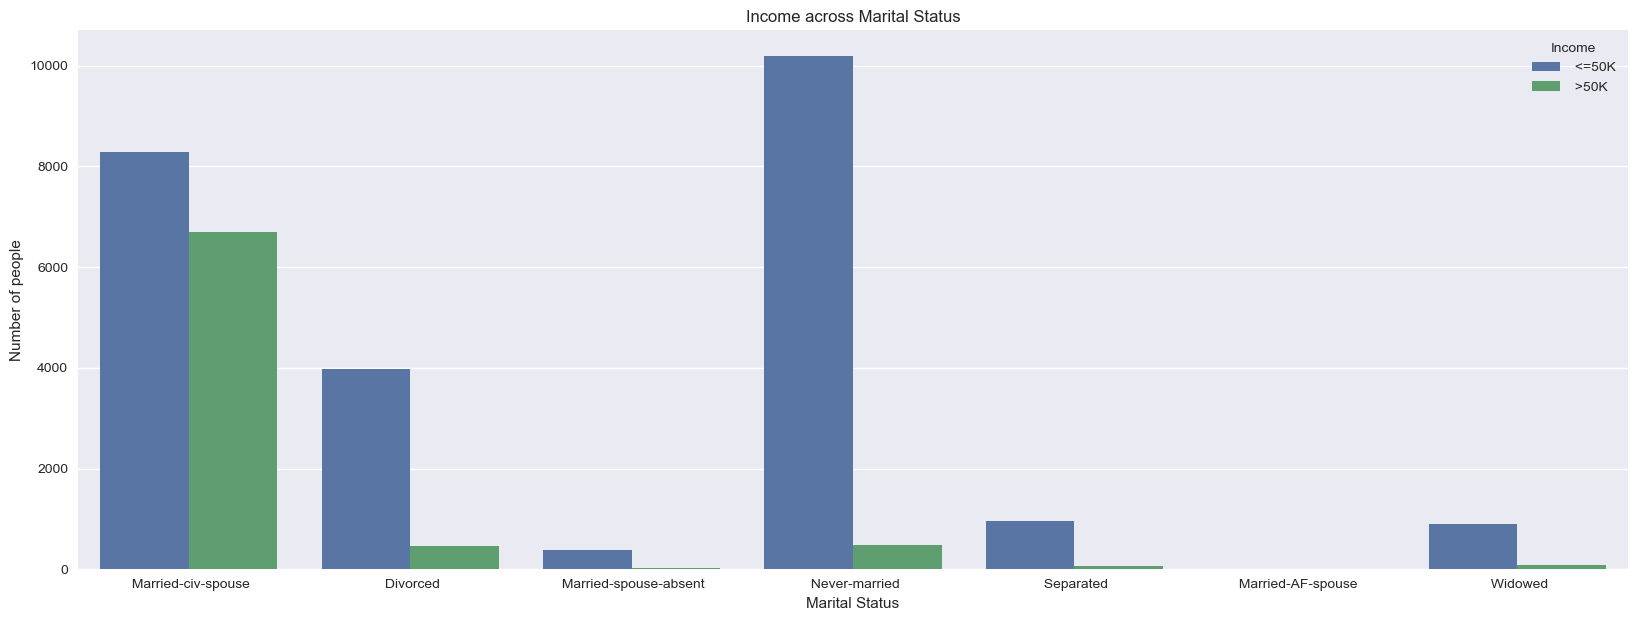

In [99]:
# Income v/s Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


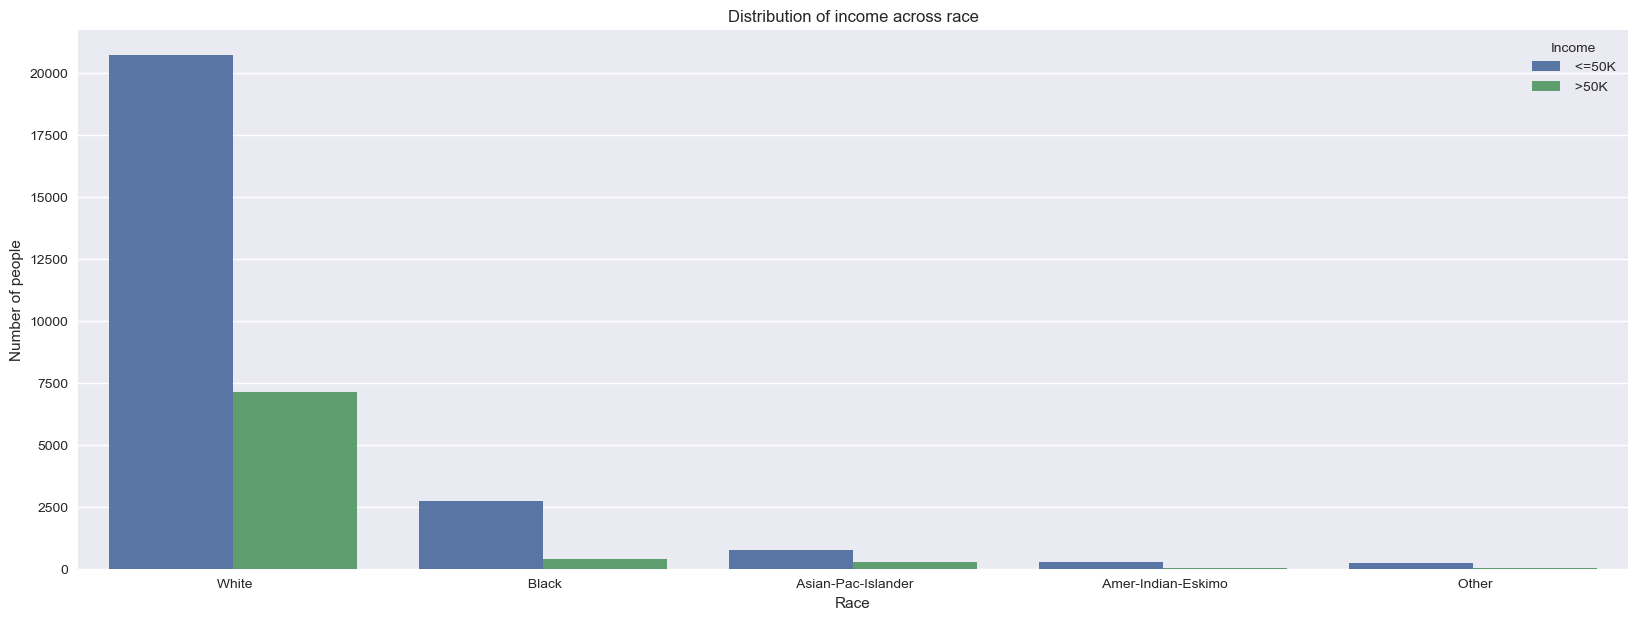

In [101]:
# Income v/s Race
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.show()

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


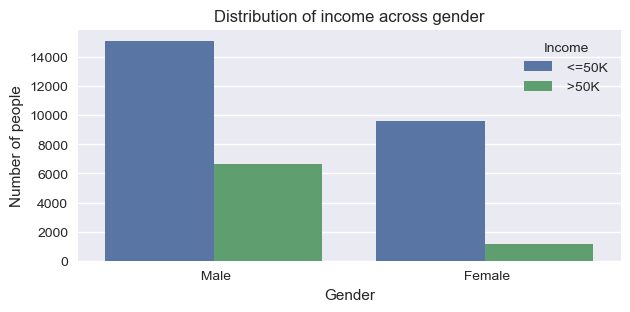

In [102]:
# Income v/s Gender
plt.figure(figsize=(7, 3))
sns.countplot(df['Sex'], hue=df['Income'])
plt.title('Distribution of income across gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [104]:
df['Income'] = le.fit_transform(df['Income'])

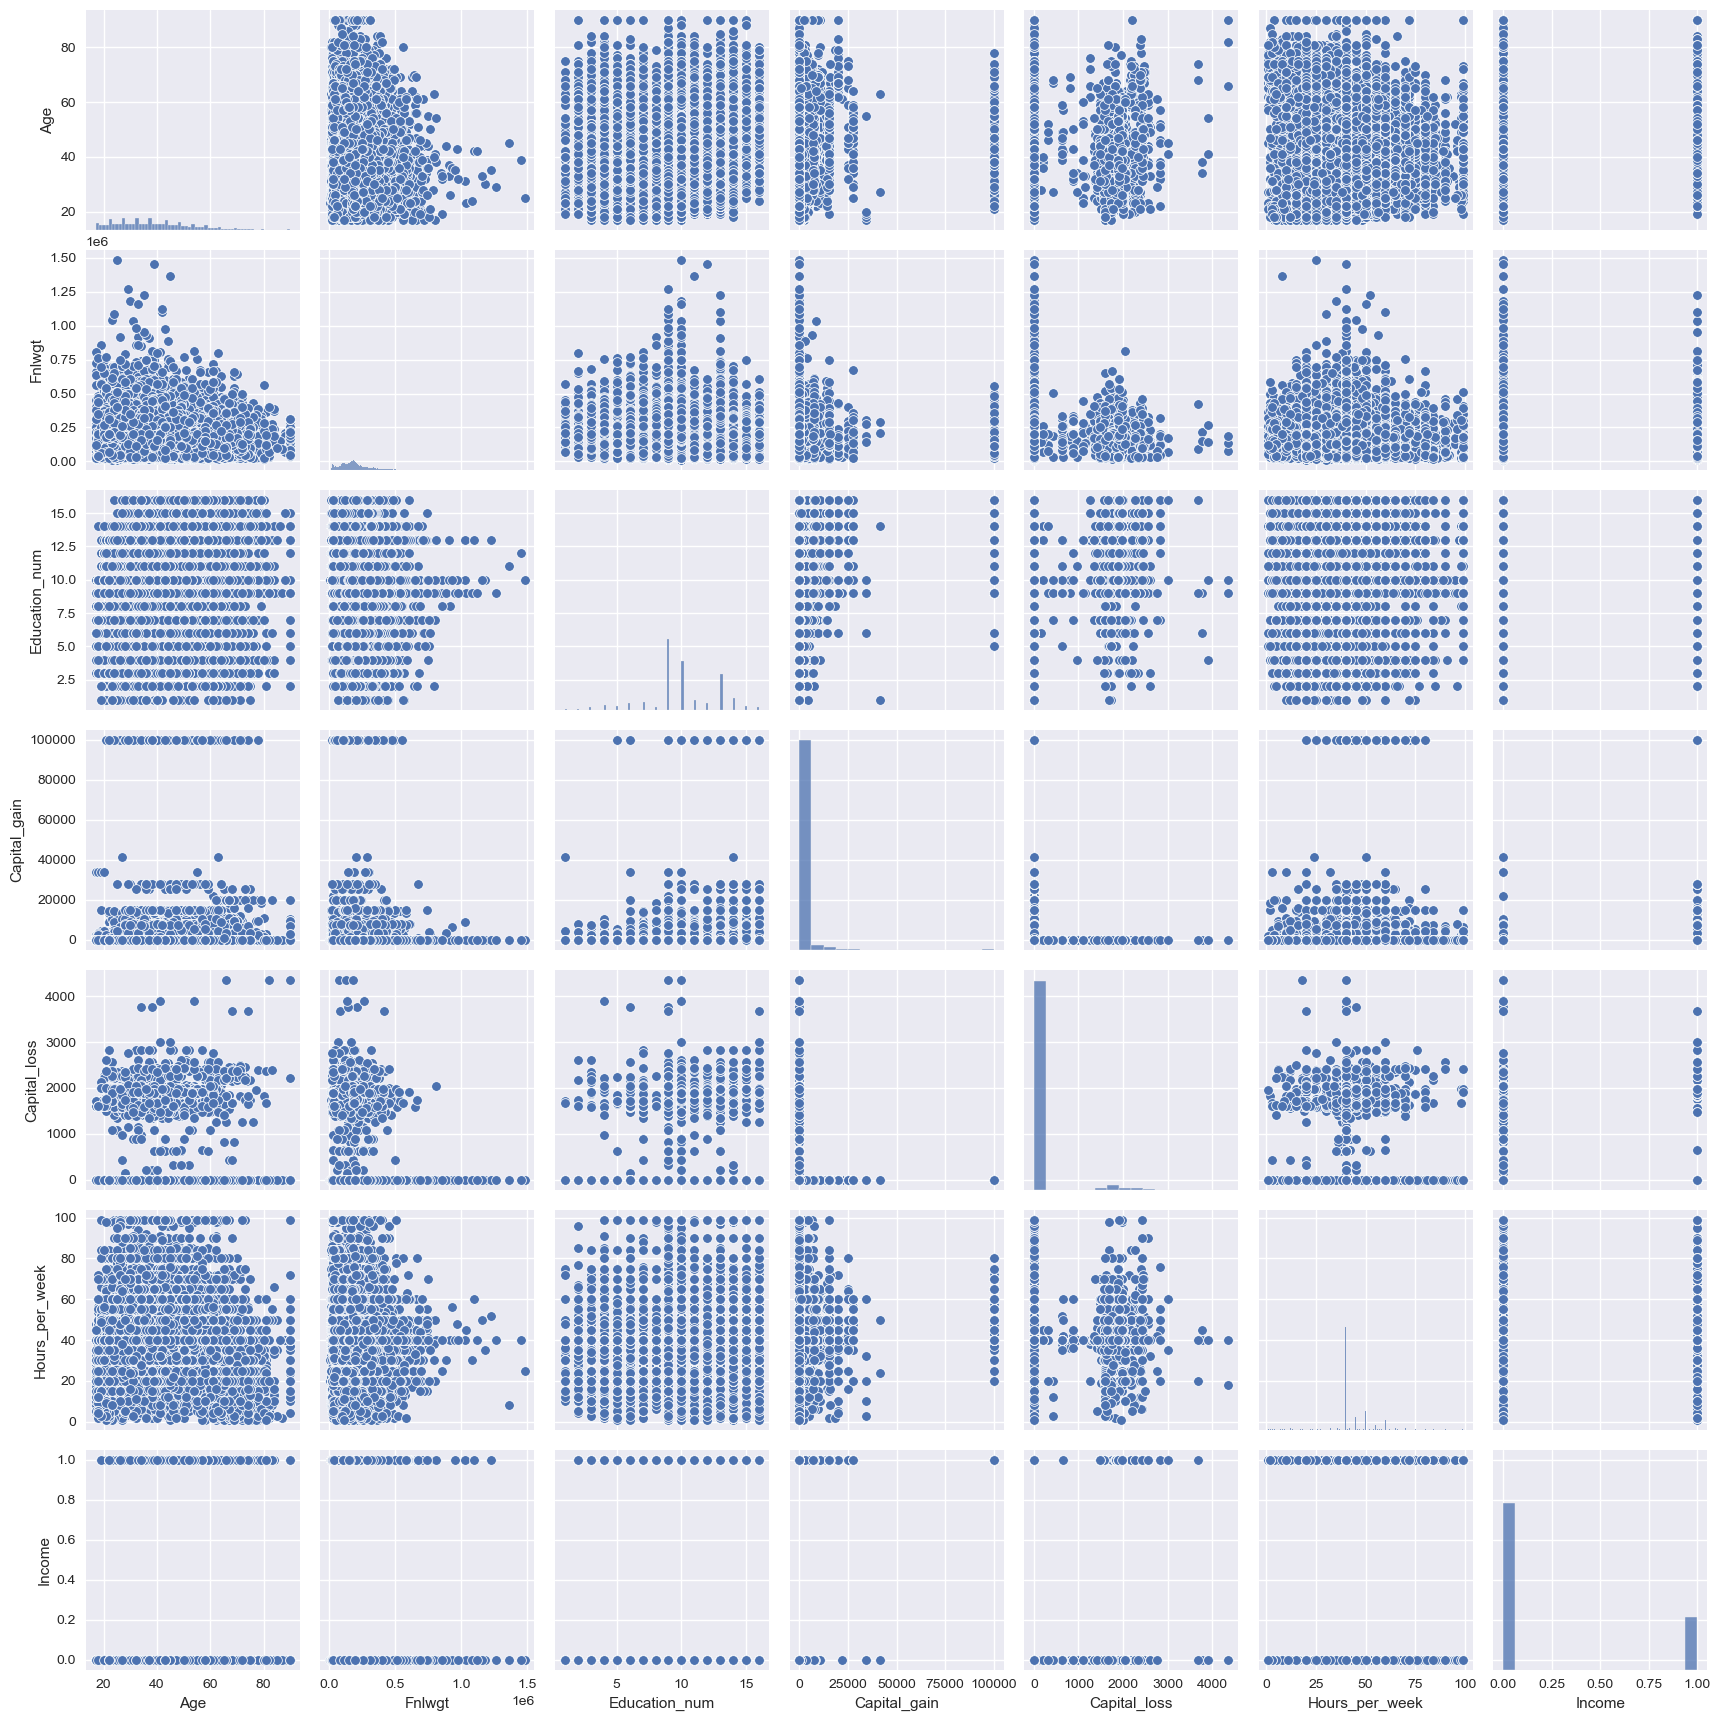

In [107]:
sns.pairplot(df)
plt.show()

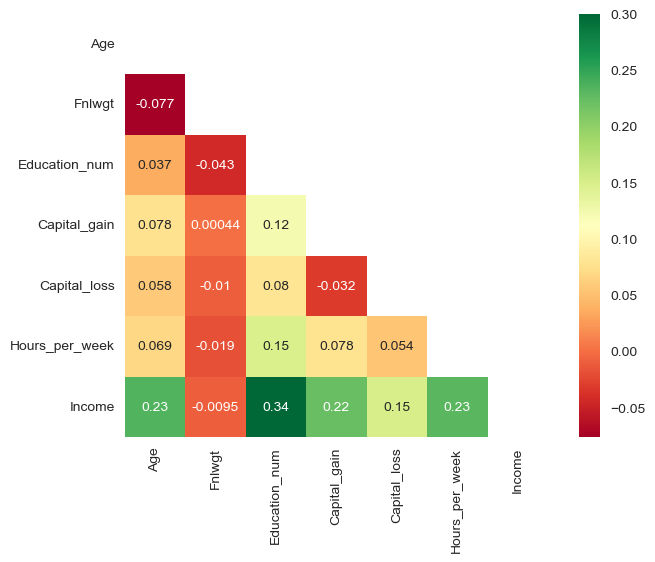

In [110]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='RdYlGn')
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Capital_gain'>

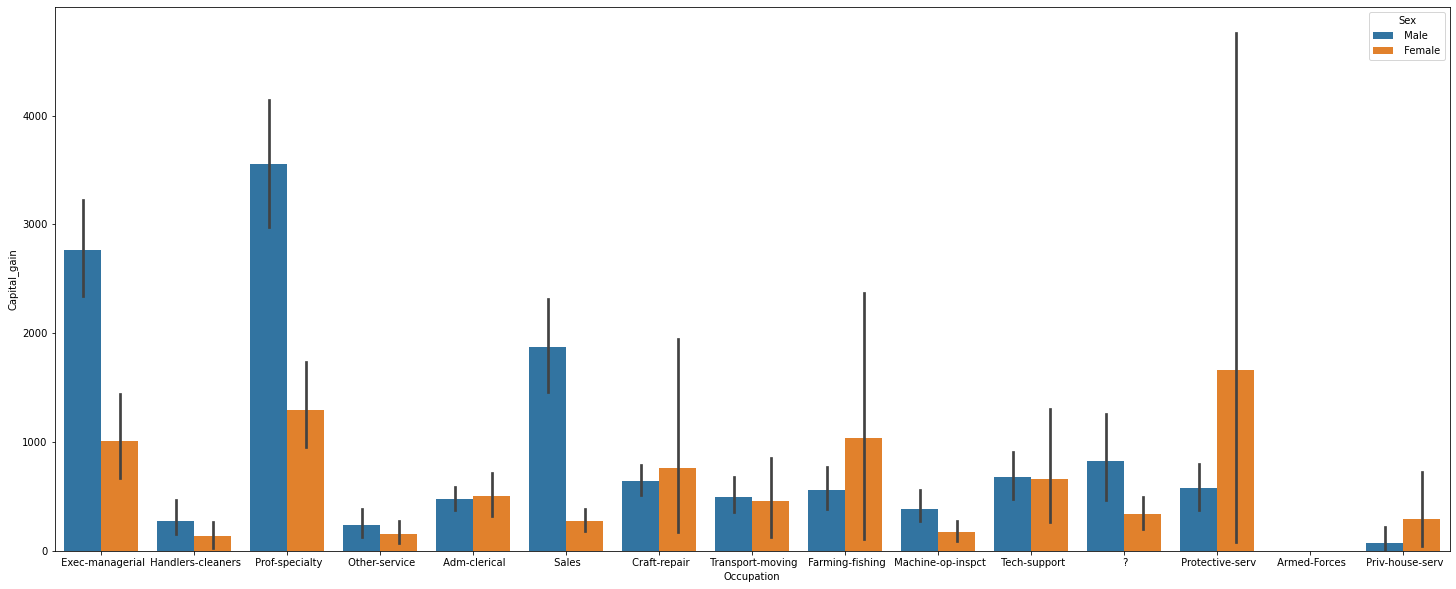

In [11]:
# Capital_gain and Occupation per Gender Distribution
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation', y='Capital_gain', data=df, hue='Sex')

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

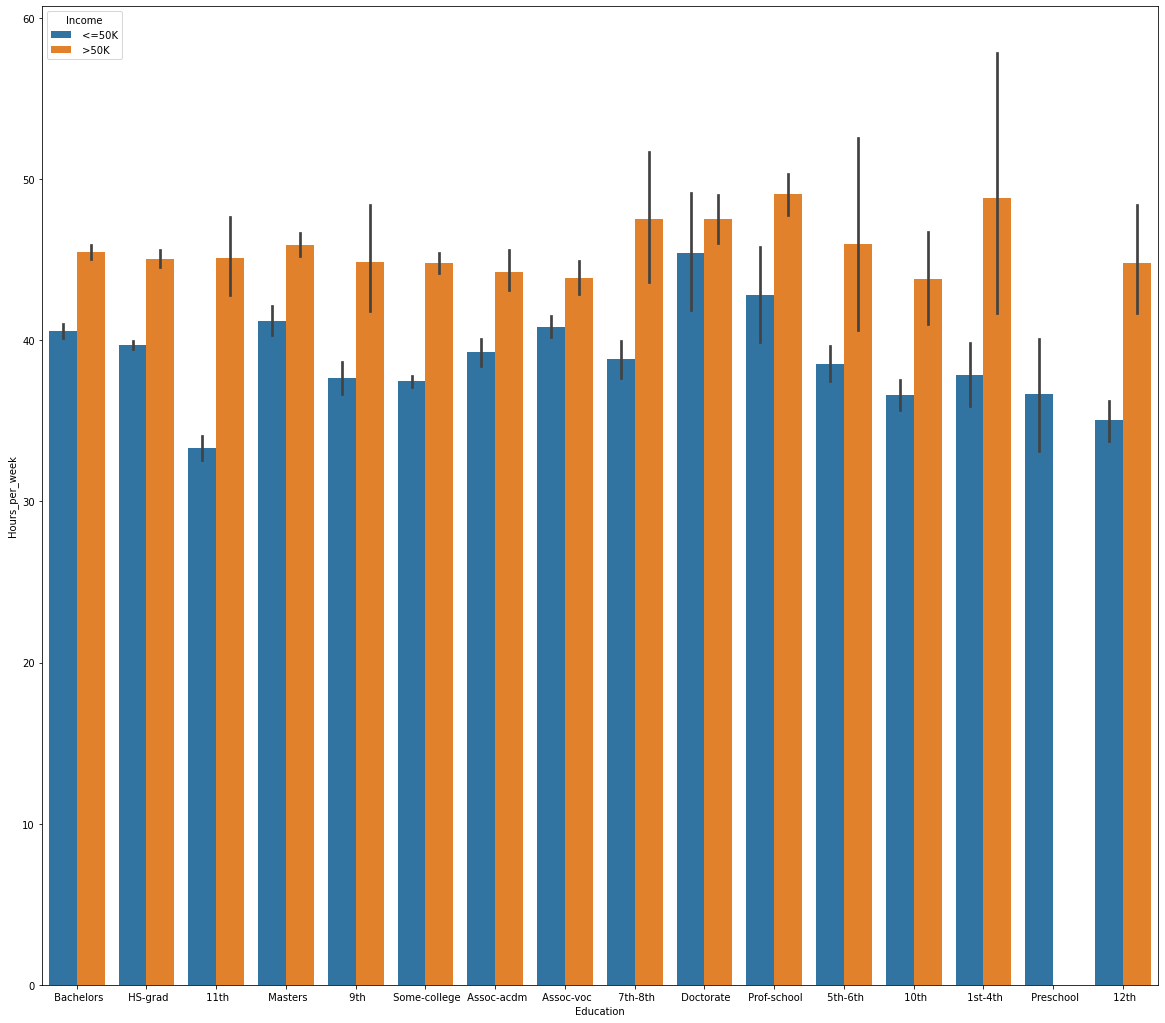

In [12]:
# Education and Hours_per_week per Gender Distribution
plt.figure(figsize=(20,18))
sns.barplot(x='Education', y='Hours_per_week', data=df, hue='Income')

In [17]:
# Use LabelEncoder to convert Income and Sex into numeric values
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income']) 
df['Sex'] = le.fit_transform(df['Sex'])

#Converting 2 columns into binary 
df = pd.get_dummies(df,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

In [48]:
# Number of Native_country containing ?
len(df.loc[df.Native_country==' ?'])

583

In [50]:
# Drop ? values
df.drop(df[df['Native_country'] == ' ?'].index, inplace=True)
len(df.loc[df.Native_country==' ?'])

0

In [46]:
# Number of Occupation containing ?
len(df.loc[df.Occupation==' ?'])

1843

In [51]:
# Drop ? values
df.drop(df[df['Occupation'] == ' ?'].index, inplace=True)
len(df.loc[df.Occupation==' ?'])

0

In [55]:
scaler = StandardScaler()
train_col_sacle = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df['Age']= train_scaler_col['Age']
df['Fnlwgt']= train_scaler_col['Fnlwgt']
df['Education_num']= train_scaler_col['Education_num']
df['Hours_per_week']= train_scaler_col['Hours_per_week']

# Model Building

In [56]:
X = df.drop(['Income'],axis=1)
y = df['Income']

In [72]:
# data = df[df["workclass"] != "?"]
len(df.loc[df['Workclass'] ==' ?'])

0

In [67]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,-0.033338,Self-emp-not-inc,0.244659,Bachelors,-0.439703,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,-0.077735,United-States,<=50K
2,1.108678,Private,0.425206,HS-grad,-1.224035,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,-0.077735,United-States,<=50K
3,-0.794682,Private,1.406626,11th,1.128961,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,-0.077735,United-States,<=50K
4,-0.109472,Private,0.897147,Bachelors,1.521127,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,-0.077735,Cuba,<=50K
5,0.804141,Private,-0.280268,Masters,-2.008366,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,-2.081077,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,Private,NaN,Assoc-acdm,NaN,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,NaN,United-States,<=50K
32557,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,NaN,United-States,>50K
32558,NaN,Private,NaN,HS-grad,NaN,Widowed,Adm-clerical,Unmarried,White,Female,0,0,NaN,United-States,<=50K
32559,NaN,Private,NaN,HS-grad,NaN,Never-married,Adm-clerical,Own-child,White,Male,0,0,NaN,United-States,<=50K


In [59]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [65]:
lr = LogisticRegression() #Logistic Regression
knn = KNeighborsClassifier() #KNearest Neibour 
dt = DecisionTreeClassifier() # Deciesion Tree
rf = RandomForestClassifier() # Random Forest
adb = AdaBoostClassifier()    # Adaboost Classifier 
svm = SVC()              # support vactor classifier        
gdboost = GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost = XGBClassifier()  #Xtrim Gredient Boosting Classifier 


In [ ]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

In [ ]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))